# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [254]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import OneHotEncoder ,LabelEncoder

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [255]:
df = pd.read_csv('/content/RTA_Dataset.csv')
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [256]:
df.sample()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
11831,22:10:00,Wednesday,31-50,Male,Elementary school,Employee,Above 10yr,Lorry (41?100Q),Owner,Above 10yr,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Crossing from nearside - masked by parked or s...,No distancing,Slight Injury


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [258]:
df['Time']=pd.to_datetime(df['Time'])

<ipython-input-258-ca8834d81e24>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time']=pd.to_datetime(df['Time'])


In [259]:
df.duplicated().sum()

0

In [260]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


In [261]:
df['Vehicle_driver_relation'].unique()

array(['Employee', 'Unknown', 'Owner', nan, 'Other'], dtype=object)

In [262]:
df['Educational_level'].unique()

array(['Above high school', 'Junior high school', nan,
       'Elementary school', 'High school', 'Unknown', 'Illiterate',
       'Writing & reading'], dtype=object)

In [263]:
df['Driving_experience'].unique()

array(['1-2yr', 'Above 10yr', '5-10yr', '2-5yr', nan, 'No Licence',
       'Below 1yr', 'unknown'], dtype=object)

In [264]:
df['Type_of_vehicle'].unique()

array(['Automobile', 'Public (> 45 seats)', 'Lorry (41?100Q)', nan,
       'Public (13?45 seats)', 'Lorry (11?40Q)', 'Long lorry',
       'Public (12 seats)', 'Taxi', 'Pick up upto 10Q', 'Stationwagen',
       'Ridden horse', 'Other', 'Bajaj', 'Turbo', 'Motorcycle',
       'Special vehicle', 'Bicycle'], dtype=object)

In [265]:
df['Owner_of_vehicle'].unique()

array(['Owner', 'Governmental', nan, 'Organization', 'Other'],
      dtype=object)

In [266]:

df['Service_year_of_vehicle'].unique()

array(['Above 10yr', '5-10yrs', nan, '1-2yr', '2-5yrs', 'Unknown',
       'Below 1yr'], dtype=object)

In [267]:
df['Area_accident_occured'].unique()

array(['Residential areas', 'Office areas', '  Recreational areas',
       ' Industrial areas', nan, 'Other', ' Church areas',
       '  Market areas', 'Unknown', 'Rural village areas',
       ' Outside rural areas', ' Hospital areas', 'School areas',
       'Rural village areasOffice areas', 'Recreational areas'],
      dtype=object)

In [268]:
df['Defect_of_vehicle'].value_counts() #not meaingful, drop it

,count
Defect_of_vehicle,
No defect,7777
7,76
5,36


In [269]:
df['Area_accident_occured'].value_counts()
df['Area_accident_occured'].unique()

array(['Residential areas', 'Office areas', '  Recreational areas',
       ' Industrial areas', nan, 'Other', ' Church areas',
       '  Market areas', 'Unknown', 'Rural village areas',
       ' Outside rural areas', ' Hospital areas', 'School areas',
       'Rural village areasOffice areas', 'Recreational areas'],
      dtype=object)

In [270]:
df['Lanes_or_Medians'].unique()
df['Lanes_or_Medians'].value_counts()

,count
Lanes_or_Medians,
Two-way (divided with broken lines road marking),4411
Undivided Two way,3796
other,1660
Double carriageway (median),1020
One way,845
Two-way (divided with solid lines road marking),142
Unknown,57


In [271]:
df['Road_allignment'].value_counts() # mode

,count
Road_allignment,
Tangent road with flat terrain,10459
Tangent road with mild grade and flat terrain,501
Steep grade downward with mountainous terrain,429
Tangent road with mountainous terrain and,396
Gentle horizontal curve,163
Escarpments,113
Sharp reverse curve,57
Tangent road with rolling terrain,37
Steep grade upward with mountainous terrain,19


In [272]:
df['Types_of_Junction'].unique()

array(['No junction', 'Y Shape', 'Crossing', 'O Shape', 'Other',
       'Unknown', 'T Shape', 'X Shape', nan], dtype=object)

In [273]:
df['Road_surface_type'].value_counts() #mode

,count
Road_surface_type,
Asphalt roads,11296
Earth roads,358
Gravel roads,242
Other,167
Asphalt roads with some distress,81


In [274]:
df['Type_of_collision'].value_counts()

,count
Type_of_collision,
Vehicle with vehicle collision,8774
Collision with roadside objects,1786
Collision with pedestrians,896
Rollover,397
Collision with animals,171
Collision with roadside-parked vehicles,54
Fall from vehicles,34
Other,26
Unknown,14


In [275]:
df['Vehicle_movement'].value_counts()

,count
Vehicle_movement,
Going straight,8158
Moving Backward,985
Other,937
Reversing,563
Turnover,489
Getting off,339
Entering a junction,193
Overtaking,96
Unknown,88


In [276]:
df.drop('Defect_of_vehicle',  axis=1, inplace=True) # same values
df.drop('Work_of_casuality', axis=1, inplace=True) #not meaningful + a lot of null
df.drop('Fitness_of_casuality', axis=1, inplace=True) #not meaningful + a lot of null

In [277]:
#fill nulls with values
df['Vehicle_driver_relation'].fillna("Unknown", inplace=True)
df['Educational_level'].fillna("Unknown", inplace=True)
df['Driving_experience'].fillna("unknown", inplace=True)
df['Type_of_vehicle'].fillna("Other", inplace=True)
df['Owner_of_vehicle'].fillna("Other", inplace=True)
df['Service_year_of_vehicle'].fillna("Unknown", inplace=True)
df['Area_accident_occured'].fillna("Unknown", inplace=True)
df['Lanes_or_Medians'].fillna("Unknown", inplace=True)
df['Types_of_Junction'].fillna("Unknown", inplace=True)
df['Type_of_collision'].fillna("Unknown", inplace=True)
df['Vehicle_movement'].fillna("Unknown", inplace=True)

In [278]:
r1 = df['Road_allignment'].mode()
print(r1)

0    Tangent road with flat terrain
Name: Road_allignment, dtype: object


In [279]:
r2= df['Road_surface_type'].mode()
print(r2)

0    Asphalt roads
Name: Road_surface_type, dtype: object


In [280]:
df['Road_allignment'].fillna("Tangent road with flat terrain", inplace=True)
df['Road_surface_type'].fillna("Asphalt roads", inplace=True)

In [281]:
#value is numrical
df['Casualty_severity'] = df['Casualty_severity'].replace('na',np.nan)
df['Casualty_severity'] = df['Casualty_severity'].fillna(-1)

df['Casualty_severity'] = df['Casualty_severity'].astype(int)
df['Casualty_severity'] = df['Casualty_severity'].replace('-1',np.nan)


In [282]:
df.isna().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Type_of_vehicle,0
Owner_of_vehicle,0
Service_year_of_vehicle,0


In [283]:
df.describe()

,Time,Number_of_vehicles_involved,Number_of_casualties,Casualty_severity
count,12316,12316.000000,12316.000000,12316.000000
mean,2024-08-01 14:17:50.768106496,2.040679,1.548149,1.490175
min,2024-08-01 00:01:00,1.000000,1.000000,-1.000000
25%,2024-08-01 10:31:00,2.000000,1.000000,-1.000000
50%,2024-08-01 15:10:00,2.000000,1.000000,3.000000
75%,2024-08-01 18:10:00,2.000000,2.000000,3.000000
max,2024-08-01 23:59:00,7.000000,8.000000,3.000000
std,NaN,0.688790,1.007179,1.887795


## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [284]:
df.sample()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
11939,2024-08-01 12:29:00,Tuesday,31-50,Male,Elementary school,Employee,5-10yr,Pick up upto 10Q,Owner,2-5yrs,...,2,1,Moving Backward,na,na,na,-1,Not a Pedestrian,Overturning,Slight Injury


In [285]:
df.keys()

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment',
       'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions',
       'Light_conditions', 'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
       'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [286]:
#find non-numerical values
df.select_dtypes(exclude='number')
#we can make encoding on them

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Pedestrian_movement,Cause_of_accident,Accident_severity
0,2024-08-01 17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury
1,2024-08-01 17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Daylight,Normal,Vehicle with vehicle collision,Going straight,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
2,2024-08-01 17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,...,Daylight,Normal,Collision with roadside objects,Going straight,Driver or rider,Male,31-50,Not a Pedestrian,Changing lane to the left,Serious Injury
3,2024-08-01 01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,...,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Pedestrian,Female,18-30,Not a Pedestrian,Changing lane to the right,Slight Injury
4,2024-08-01 01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Other,Owner,5-10yrs,...,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,2024-08-01 16:15:00,Wednesday,31-50,Male,Unknown,Employee,2-5yr,Lorry (11?40Q),Owner,Unknown,...,Daylight,Normal,Vehicle with vehicle collision,Going straight,na,na,na,Not a Pedestrian,No distancing,Slight Injury
12312,2024-08-01 18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Unknown,...,Daylight,Normal,Vehicle with vehicle collision,Other,na,na,na,Not a Pedestrian,No distancing,Slight Injury
12313,2024-08-01 13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Daylight,Normal,Vehicle with vehicle collision,Other,Driver or rider,Male,31-50,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,2024-08-01 13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Darkness - lights lit,Normal,Vehicle with vehicle collision,Other,na,na,na,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [287]:
#one hot ('Sex_of_driver' , 'Owner_of_vehicle')
ohe = OneHotEncoder(sparse_output=False)

owner_endoced = ohe.fit_transform(df[['Owner_of_vehicle']])
owner_endoced_df = pd.DataFrame(owner_endoced, columns=ohe.get_feature_names_out(['Owner_of_vehicle']))

gender_endoced = ohe.fit_transform(df[['Sex_of_driver']])
gender_endoced_df = pd.DataFrame(gender_endoced, columns=ohe.get_feature_names_out(['Sex_of_driver']))

df_one_hot = pd.concat([df, owner_endoced_df,gender_endoced_df ],axis=1)
df_one_hot.drop(['Owner_of_vehicle','Sex_of_driver'], axis=1, inplace=True)
df = df_one_hot


In [288]:
df_one_hot.sample()

,Time,Day_of_week,Age_band_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Service_year_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Pedestrian_movement,Cause_of_accident,Accident_severity,Owner_of_vehicle_Governmental,Owner_of_vehicle_Organization,Owner_of_vehicle_Other,Owner_of_vehicle_Owner,Sex_of_driver_Female,Sex_of_driver_Male,Sex_of_driver_Unknown
9406,2024-08-01 06:10:00,Friday,31-50,Elementary school,Employee,5-10yr,Taxi,2-5yrs,Office areas,Double carriageway (median),...,Not a Pedestrian,No priority to vehicle,Slight Injury,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [332]:

#label encoded

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df['Accident_severity'] = le.fit_transform(df['Accident_severity'])

df['Accident_severity'].unique()

array([2, 1, 0])

## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

In [290]:
df.keys()

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Educational_level',
       'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle',
       'Service_year_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity',
       'Owner_of_vehicle_Governmental', 'Owner_of_vehicle_Organization',
       'Owner_of_vehicle_Other', 'Owner_of_vehicle_Owner',
       'Sex_of_driver_Female', 'Sex_of_driver_Male', 'Sex_of_driver_Unknown'],
      dtype='object')

<Axes: xlabel='Age_band_of_driver', ylabel='count'>

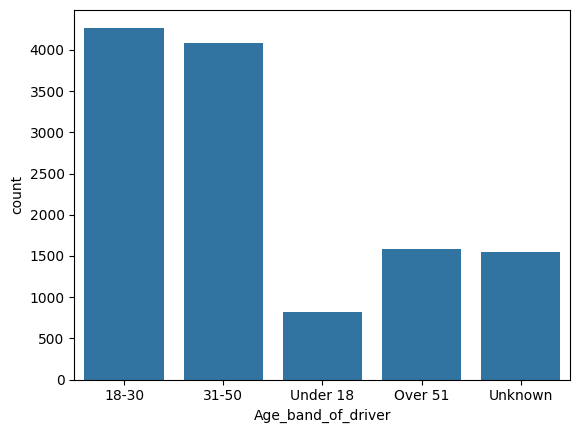

In [291]:
sns.countplot(data=df, x='Age_band_of_driver' )

<Axes: xlabel='Day_of_week', ylabel='count'>

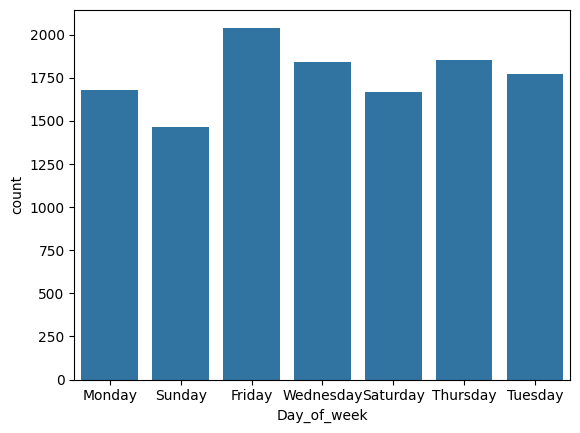

In [292]:
sns.countplot(data=df, x='Day_of_week' )

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [364]:
from sklearn.model_selection import train_test_split

df['Time'] = pd.to_datetime(df['Time']).astype('int64')
X= np.array(df.value_counts())

y = np.array(df['Accident_severity'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [365]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X.reshape(-1, 1), y)

lin_reg.predict(X.reshape(-1, 1))

print('linear regression model intercept is', lin_reg.intercept_)
print('linear regression model Co-efficient is', lin_reg.coef_)

linear regression model intercept is 1.8328190971094511
linear regression model Co-efficient is [0.]


#### Decision Tree Classifier

In [375]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X.reshape(-1, 1), y)

tree_clf.predict([[1.5]])

array([2])

#### Support Vector Machine (SVM)

In [379]:
from sklearn.svm import SVC

svm_clf = SVC(C=1.0, kernel='rbf',)
svm_clf.fit(X.reshape(-1, 1),y)

#Slight Injury,Serious Injury
slight_or_serious = (y == 1) | (y == 2)
X = X[slight_or_serious]
y = y[slight_or_serious]

svm_clf = SVC(kernel="linear", C=1.0)
svm_clf.fit(X.reshape(-1, 1), y)

SVC(kernel='linear')

#### K-Neighbors Classifier

In [380]:
from sklearn.neighbors import KNeighborsClassifier

kkn_clf = KNeighborsClassifier(weights='distance', n_neighbors= 3)
kkn_clf.fit(X.reshape(-1, 1), y)

KNeighborsClassifier(n_neighbors=3, weights='distance')

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

TypeError: missing a required argument: 'y_pred'

## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here: